[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/PennNGG/Quantitative-Neuroscience/blob/master/Measures%20of%20Association/Python/Parametric%20Correlation%20Coefficient.ipynb)

# Definitions

Correlation is a measure of association between measured (random) variables. The Pearson's correlation coefficient quantifies the strength of this association on a simple scale: it varies between -1 and 1. The larger the absolute value of this correlation coefficient, the tighter the correlation and more predictive it is. The smaller the absolute value, the weaker the correlation and less predictive. Positive values imply a positive correlation: as I eat more ice cream, my weight goes up. Negative values imply a negative correlation: as I eat more ice cream, my weight goes down (wouldn't that be great!). 

The Pearson's correlation coefficient is called parametric because it assumes a parametric form of the distributions of the two random variables, $X$ and $Y$; specifically, that both variables are [normally distributed](https://colab.research.google.com/drive/1-KxH3FCq5rDyyO33HXxewIv-kKldkINi?usp=sharing).

# Computing for a population

When you have full knowledge of the joint distribution of $𝑋$ and $Y$ (e.g., when working with an idealized model, not with real, finite data sets), the Pearson's correlation coefficient is typically denoted as $\rho$ and computed in terms of the covariance between the two variables, normalized by the product of their individual standard deviations:

$\quad\rho_{X,Y}=\frac{cov(X,Y)}{\sigma_x\sigma_y}$

where

$\quad cov(X,Y)=E\left [ (X-\mu_X)(Y-\mu_Y)\right ]$

in which $\mu_X$ and $\mu_Y$ are the means of $X$ and $Y$, respectively, and $E\left[\right]$ denotes expected value.

# Computing for a sample

When working with real data, you have a [sample, not a population](https://colab.research.google.com/drive/1SnVM1MPaFvMSjlDLyihgeZ25OAk-k4Nk?usp=sharing), and thus need to compute the correlation coefficient (typically denoted as *r*) using sample statistics.

## Sample Pearson's correlation coefficient

$\quad r_{X,Y}=\frac{\sum^n_{i-1}{(x_i-\bar{x})(y_i-\bar{y})}}{\sqrt{\sum^n_{i-1}{(x_i-\bar{x})^2}}\sqrt{\sum^n_{i-1}{(y_i-\bar{y})^2}}}$

where

$\quad \bar{x}=\frac{1}{n}\sum^n_{i=1}{x_i,\bar{y}}=\frac{1}{n}\sum^n_{i=1}{y_i}$

are the sample means.

## Coefficient of determination

It is possible to compute $r_{X,Y}$ not just when $X$ and $Y$ are two random variables, but also when one is a random (dependent) variable (typically $Y$) and the other is an independent or explanatory variable (typically $X$). In this case, the square of the correlation coefficient ($r^2$) quantifies the total variation in one variable ($Y$) that is explained by the regression line with respect to the other variable ($X$). This quantity is called the **coefficient of determination** and is often referred to as the fraction of explained variance

## Standard error of the sample Pearson's correlation coefficient

The standard error of the sample *r* is computed by assuming that r follows a [Student's t distribution](https://colab.research.google.com/drive/1Q_Du5NK71Rc1qu-byh8dy8Fs39uvR_4n?usp=sharing) with two degrees of freedom (because of the two variables):

$\quad s_r=\sqrt{\frac{1-r^2}{n-2}}$

Note that "standard error" refers in general to the standard deviation of a statistical estimate, which here is *r*. It is not the same thing as the "standard error of the mean", which refers to the standard deviation of a statistical estimate of a mean.

## Confidence intervals for the sample Pearson's correlation coefficient

This is a bit tricker to compute, because r is not normally distributed, particularly around the extreme values (e.g., around 1, the distribution cannot go higher than one but can take many values <1). We therefore need to do the following (a good explanation is [here](http://faculty.washington.edu/gloftus/P317-318/Useful_Information/r_to_z/PearsonrCIs.pdf)):

1\. Take the Fisher's z-transformation of r:

$\quad z=0.5\times ln(\frac{1+r}{1-r})$

2\. Compute its standard deviation as:

$\quad s_z=\sqrt{\frac{1}{n-3}}$

3\. Compute confidence intervals in this z-space as we have shown [here](https://colab.research.google.com/drive/1rdJMusMZDTaM9OGsyt27tCVkSasmRj2O?usp=sharing), as: 

$\quad z \pm (z\:criterion) \times s_z$

where the *z* criterion is determined from the desired confidence value using a [z-score calculator](http://www.z-table.com) or [norminv](https://www.mathworks.com/help/stats/norminv.html) in Matlab.

4\. Then translate each *z* value back to *r* as:

$\quad r=\frac{e^{2z}-1}{e^{2z}-1}$


## Hypothesis testing on the sample Pearson's correlation coefficient

For $H_0: r=0$. Here we are considering a null distribution that is centered at *r*=0. In this case, we know that the distribution of *r* around that mean is symmetric, and the sample mean follows follows a [Student's *t* distribution](https://colab.research.google.com/drive/1Q_Du5NK71Rc1qu-byh8dy8Fs39uvR_4n?usp=sharing).  Therefore, our test statistic is simply the *t* statistic, which we compute as the residual (with respect to zero) of *r* divided by its standard error:

$\quad t=\frac{r}{s_r}$

with $n-2$ degrees of freedom.

For $H_0: r=r_s,\:where\:r_s\ne 0$. Here we are considering null distributions that are not centered at $r=0$ and therefore are not symmetric and do not follow a *t* distribution. We therefore first compute the *z* transformation of $r$ and $r_s$, as above. Now our test statistic is:

$\quad \lambda =\frac{z_r-z_{rs}}{\sqrt{\frac{1}{n-3}}}$

with $n-2$ degrees of freedom.



# Getting started with code

Matlab code is found in the [NGG Statistics GitHub Repository](https://github.com/PennNGG/Statistics.git) under "Hypothesis Testing/ParametricCorrelationExercies.m".

Python code is included below. First run the code cell just below to make sure all of the required Python modules are loaded, then you can run the other cell(s).

In [1]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

# Exercises

Let's examine the relationship between these two measured variables:

Wing length | Tail length
--- | ---
10.4 | 7.4
10.8 | 7.6
11.1 | 7.9
10.2 | 7.2
10.3 | 7.4
10.2 | 7.1
10.7 | 7.4
10.5 | 7.2
10.8 | 7.8
11.2 | 7.7
10.6 | 7.8
11.4 | 8.3

Assume Wing length is the $X$ variable and Tail Length is the $Y$ variable, both measured in cm.

##### 1\. Plot X vs Y. Do they look related?

Text(0, 0.5, 'Wing Length (cm)')

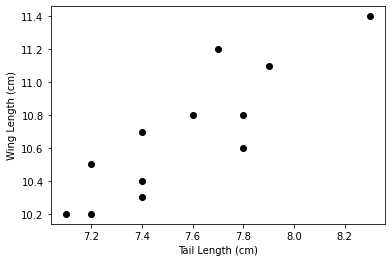

In [2]:
# Always run this cell to load the data
wing_length = [10.4, 10.8, 11.1, 10.2, 10.3, 10.2, 10.7, 10.5, 10.8, 11.2, 10.6, 11.4]
tail_length = [7.4, 7.6, 7.9, 7.2 ,7.4, 7.1, 7.4, 7.2, 7.8, 7.7, 7.8, 8.3]

# Plot the data
plt.plot(tail_length, wing_length, 'ko')
plt.xlabel('Tail Length (cm)')
plt.ylabel('Wing Length (cm)')

##### 2\. Calculate $r_{X,Y}$ and $r_{Y,X}$, first using the equations above and then using either the Python numpy funciton [corrcoef](https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html) or Matlab's built-in [corrcoef](https://www.mathworks.com/help/matlab/ref/corrcoef.html). Did you get the same answers?

In [ ]:
# 1. Compute by hand
n             = np.size(wing_length)
sample_mean_x = np.sum(wing_length)/n
sample_mean_y = np.sum(tail_length)/n
SSEX          = np.sum((wing_length - sample_mean_x) ** 2)
SSEY          = np.sum((tail_length - sample_mean_y) ** 2)
SCOVXY        = np.sum((wing_length - sample_mean_x)*(tail_length - sample_mean_y))
rXY           = SCOVXY/(np.sqrt(SSEX)*np.sqrt(SSEY))
rYX           = SCOVXY/(np.sqrt(SSEY)*np.sqrt(SSEX))

# Use corrcoef
r_builtin = np.corrcoef(wing_length, tail_length)

# Show that they are all the same
print(f'rXY={rXY:.4f} (computed), {r_builtin[0,1]:.4f} (built-in)')
print(f'rYX={rYX:.4f} (computed), {r_builtin[1,0]:.4f} (built-in)')

rXY=0.8704 (computed), 0.8704 (built-in)
rYX=0.8704 (computed), 0.8704 (built-in)


##### 3\. What is the standard error of $r_{X,Y}$? The 95% confidence intervals computed from the standard error?

In [ ]:
# Compute standard error directly 
standard_error_r = np.sqrt((1-rXY**2)/(n-2))

# Compute confidence intervals *of the full distribution* by: 
# 1. using Fisher's z-tranformation to make a variable that is normally distributed
z = 0.5*np.log((1+rXY)/(1-rXY))

# 2. Compute the standard deviation of z
z_std = np.sqrt(1/(n-3))

# 3. Get the 95% CIs of the transformed variable from the std
scale = st.norm.ppf(0.025)*z_std
z_95CIs = np.array([z+scale, z-scale])

# 4. Convert back to r (inverse z-transformation)
CI95 = (np.exp(2*z_95CIs)-1)/(np.exp(2*z_95CIs)+1)
# Show it
print(f'r={rXY:.2f}, sem={standard_error_r:.4f}, 95 pct CI = [{CI95[0]:.4f}, {CI95[1]:.4f}]')

r=0.87, sem=0.1557, 95 pct CI = [0.5923, 0.9632]


##### 4\. Should the value of $r_{X,Y}$ be considered significant at the *p*<0.05 level, given a two-tailed test (i.e., we reject if the test statistic is too large on either tail of the null distribution) for $H_0: r_{X,Y}=0$?

In [ ]:
# Compute p-value for H0:r=0
# Two-tailed test
# Remember that the *mean* of r follows a Student's t distribution with two degrees of freedom

# First compute the t-statistic, which is the sample r divided by the sample standard error
t_val = rXY/standard_error_r

# Now compute the p-value. We want the probabily of getting a value of the test statistic that is *at least as large* as the one that we actually measured from our sample (i.e., tVal), given the null distribution. Here we define the null distribution as the t distribution  with n-2 degrees of freedom (recall that the t-distribution for a "regular" t-test has n-1 degrees of freedom... here it's n-2 because we have two samples, X and Y). Because we are using a two-tailed test, this p-value is equal to twice the area under the null t distribution that is greater than tVal. The cumulative distribution is the area that is less than a particular value, so we want 1-cdf
prob = 2*(1-st.t.cdf(t_val,n-2))

# Print it nicely
print(f'p={prob:.4f} for H0: r=0')

p=0.0002 for H0: r=0


##### 5\. Yale does the exact same study and finds that his correlation value is 0.75. Is this the same as yours? That is, evaluate $𝐻_0: r=0.75$.

In [ ]:
# Is this r value different than r=0.75? 
# Here we use a z-test on the z-transformed values, as described in the Canvas discussion

# z-transform the new referent
z_Yale = 0.5*np.log((1+0.75)/(1-0.75))

# Compute the text statistic as the difference in z-transformed values, divided by the sample standard deviation
plambda = (z-z_Yale)/z_std

# Get a p-value from a two-tailed test
prob2 = 2*(1-st.norm.cdf(plambda))
print(f'p={prob2:.4f} for H0: r=0.75')

p=0.2780 for H0: r=0.75


##### 6\. Finally, calculate the statistical power and sample size needed to reject $H_0:r=0\:when\:r\ge 0.5$.

In [ ]:
# Estimate power: That is, p(reject H0|H1 is true)

# Compute the test statistic as above
r_ref   = 0.5;  
z_ref   = 0.5*np.log((1+r_ref)/(1-r_ref))
plambda = (z-z_ref)/np.sqrt(1/(n-3))

# Set a criterion based on alpha
alpha = 0.05
z_criterion = st.norm.ppf(1-alpha/2)

# Power is proportion of expected sample distribution to the right of the criterion
power = 1-st.norm.cdf(z_criterion-plambda)

# Calculate the n needed to ensure that H0 (r=0) is rejected 99% of the time when |r|>= 0.5 at a 0.05 level of significance
#
# Derivation:
#   power = 1-normcdf(z_criterion-lambda)
#   1 - power = normcdf(z_criterion-lambda)
#   zCriterion-lambda = norminv(1 - power)
#   plambda  = z_criterion - norminv(1 - power)
#   (z-z_ref)/sqrt(1/(n-3)) = z_criterion - norminv(1 - power)
#   sqrt(1/(n-3)) = (z-z_ref) / (z_criterion - norminv(1 - power))
#   n = 1/((z-z_ref) / (z_criterion - norminv(1 - power)))^2+3
desired_power = 0.99
predicted_n = np.ceil(1/((z-z_ref) / (z_criterion - st.norm.ppf(1-desired_power)))**2+3)

print(f'power = {power:.4f}, predicted n = {int(predicted_n)}')

power = 0.6539, predicted n = 33


# Additional Resources


- Differences between correlation and regression are discussed [here](https://www.bmj.com/about-bmj/resources-readers/publications/statistics-square-one/11-correlation-and-regression) and [here](http://www.biostathandbook.com/linearregression.html).

- A reference on [how to choose the appropriate measure of association](https://journals.sagepub.com/doi/pdf/10.1177/8756479308317006) (Khamis 2008).

# Credits

Copyright 2021 by Joshua I. Gold, University of Pennsylvania